In [9]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import xarray as xr
from datetime import datetime, timedelta

In [10]:
from glob import glob


In [20]:
list_of_maps

['/Odyssey/public/NeurOST/2010-2020/NeurOST_SSH-SST_20200101_20240507.nc',
 '/Odyssey/public/NeurOST/2010-2020/NeurOST_SSH-SST_20200102_20240507.nc',
 '/Odyssey/public/NeurOST/2010-2020/NeurOST_SSH-SST_20200103_20240507.nc',
 '/Odyssey/public/NeurOST/2010-2020/NeurOST_SSH-SST_20200104_20240507.nc',
 '/Odyssey/public/NeurOST/2010-2020/NeurOST_SSH-SST_20200105_20240507.nc',
 '/Odyssey/public/NeurOST/2010-2020/NeurOST_SSH-SST_20200106_20240507.nc',
 '/Odyssey/public/NeurOST/2010-2020/NeurOST_SSH-SST_20200107_20240507.nc',
 '/Odyssey/public/NeurOST/2010-2020/NeurOST_SSH-SST_20200108_20240507.nc',
 '/Odyssey/public/NeurOST/2010-2020/NeurOST_SSH-SST_20200109_20240507.nc',
 '/Odyssey/public/NeurOST/2010-2020/NeurOST_SSH-SST_20200110_20240507.nc',
 '/Odyssey/public/NeurOST/2010-2020/NeurOST_SSH-SST_20200111_20240507.nc',
 '/Odyssey/public/NeurOST/2010-2020/NeurOST_SSH-SST_20200112_20240507.nc',
 '/Odyssey/public/NeurOST/2010-2020/NeurOST_SSH-SST_20200113_20240507.nc',
 '/Odyssey/public/NeurOST

In [30]:

# Import data to interp
# TO EDIT
#file_map = "/Odyssey/private/t22picar/data/ssh_L4/SSH_L4_CMEMS_2019.nc"

size_grid="4th"

#list_of_maps = sorted(glob('/Odyssey/public/NeurOST/2010-2020/NeurOST_SSH-SST_2020*_20240507.nc'))

list_of_maps = ["/Odyssey/public/NeurOST/2010-2020/NeurOST_SSH-SST_20191231_20240507.nc", "/Odyssey/public/NeurOST/2010-2020/NeurOST_SSH-SST_20200101_20240507.nc"]

maps = xr.open_mfdataset(list_of_maps, combine='nested', concat_dim='time')
maps = maps.rename({"longitude" : "lon"})
maps = maps.rename({"latitude" : "lat"})
maps.coords['lon'] = (maps.coords['lon'] + 180) % 360 - 180
maps = maps.sortby(maps.lon)
maps = maps.transpose('time','lat','lon')
#ds = ds.transpose('time','lat','lon')

start_date = datetime(2019, 12, 31)
end_date = datetime(2020, 1, 2)

start_time= start_date.strftime("%Y-%m-%d")
end_time= end_date.strftime("%Y-%m-%d")

                                
file_out = "/Odyssey/public/NeurOST/"
str_save_file = f"NeurOST_{start_time}_{end_time}_{size_grid}.nc"

# Import reference grid 
map_4th = "/Odyssey/private/t22picar/data/glorys_15m/glorys_multivar_15m_2010-2018.nc"
map_4th = xr.open_dataset(map_4th).sel(time="2010-01-01")
lat_ref = map_4th.lat.values
lon_ref = map_4th.lon.values

map = maps.sel(time=slice(start_date,start_date))

ds = map.interp({"lat":lat_ref, "lon":lon_ref}, method="linear")
current_date = start_date + timedelta(days=1)

time_index=1
while current_date < end_date:
    map = maps.sel(time=current_date)
    map = map.interp({"lat":lat_ref, "lon":lon_ref}, method="linear")

    # Concaténation
    ds = xr.concat([ds, map], dim="time")
    current_date += timedelta(days=1)
# save data 

#save_file=file_out+str_save_file
# Sauvegarder le DataArray en fichier NetCDF
#ds.to_netcdf(save_file)

In [31]:
ds

<xarray.Dataset> Size: 31MB
Dimensions:                 (time: 2, lat: 680, lon: 1440)
Coordinates:
    Lambert_Azimuthal_Grid  int32 4B -2147483647
  * time                    (time) datetime64[ns] 16B 2019-12-31 2020-01-01
  * lat                     (lat) float32 3kB -80.0 -79.75 -79.5 ... 89.75 90.0
  * lon                     (lon) float32 6kB -180.0 -179.7 ... 179.7 179.9
Data variables:
    adt                     (time, lat, lon) float32 8MB dask.array<chunksize=(1, 680, 1440), meta=np.ndarray>
    sla                     (time, lat, lon) float32 8MB dask.array<chunksize=(1, 680, 1440), meta=np.ndarray>
    ugos                    (time, lat, lon) float32 8MB dask.array<chunksize=(1, 680, 1440), meta=np.ndarray>
    vgos                    (time, lat, lon) float32 8MB dask.array<chunksize=(1, 680, 1440), meta=np.ndarray>
Attributes: (12/38)
    title:                      Daily NeurOST (SSH-SST) Sea Surface Height an...
    summary:                    A mapped level 4 sea surface height analysis ...
    Conventions:                CF-1.10
    standard_name_vocabulary:   NetCDF Climate and Forecast (CF) Metadata Con...
    keywords:                   Oceans > Sea Surface Topography > Sea Surface...
    keywords_vocabulary:        NASA Global Change Master Directory (GCMD) Sc...
    ...                         ...
    publisher_name:             JPL PO.DAAC
    publisher_url:              http://podaac.jpl.nasa.gov
    date_created:               2024-05-06T15:45:37.227985
    references:                 https://doi.org/10.31223/X5W676 and https://d...
    comment:                    NeurOST = Neural Ocean Surface Topography. Ne...
    NCO:                        netCDF Operators version 5.2.1 (Homepage = ht...

In [32]:
ds.lon

<xarray.DataArray 'lon' (lon: 1440)> Size: 6kB
array([-180.     , -179.74988, -179.49977, ...,  179.41644,  179.66655,
        179.91667], dtype=float32)
Coordinates:
    Lambert_Azimuthal_Grid  int32 4B -2147483647
  * lon                     (lon) float32 6kB -180.0 -179.7 ... 179.7 179.9

In [55]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd 
import sys 

sys.path.append("../../../tools")
from plot_tools import plot_uv_map,plot_map_zoom

In [56]:
ssh = xr.open_dataset(save_file)
ssh

<xarray.Dataset> Size: 31MB
Dimensions:                 (time: 2, lat: 680, lon: 1440)
Coordinates:
    Lambert_Azimuthal_Grid  int32 4B ...
  * time                    (time) datetime64[ns] 16B 2010-01-01 2010-01-02
  * lat                     (lat) float32 3kB -80.0 -79.75 -79.5 ... 89.75 90.0
  * lon                     (lon) float32 6kB -180.0 -179.7 ... 179.7 179.9
Data variables:
    adt                     (time, lat, lon) float32 8MB ...
    sla                     (time, lat, lon) float32 8MB ...
    ugos                    (time, lat, lon) float32 8MB ...
    vgos                    (time, lat, lon) float32 8MB ...
Attributes: (12/38)
    title:                      Daily NeurOST (SSH-SST) Sea Surface Height an...
    summary:                    A mapped level 4 sea surface height analysis ...
    Conventions:                CF-1.10
    standard_name_vocabulary:   NetCDF Climate and Forecast (CF) Metadata Con...
    keywords:                   Oceans > Sea Surface Topography > Sea Surface...
    keywords_vocabulary:        NASA Global Change Master Directory (GCMD) Sc...
    ...                         ...
    publisher_name:             JPL PO.DAAC
    publisher_url:              http://podaac.jpl.nasa.gov
    date_created:               2024-05-06T19:15:05.422324
    references:                 https://doi.org/10.31223/X5W676 and https://d...
    comment:                    NeurOST = Neural Ocean Surface Topography. Ne...
    NCO:                        netCDF Operators version 5.2.1 (Homepage = ht...

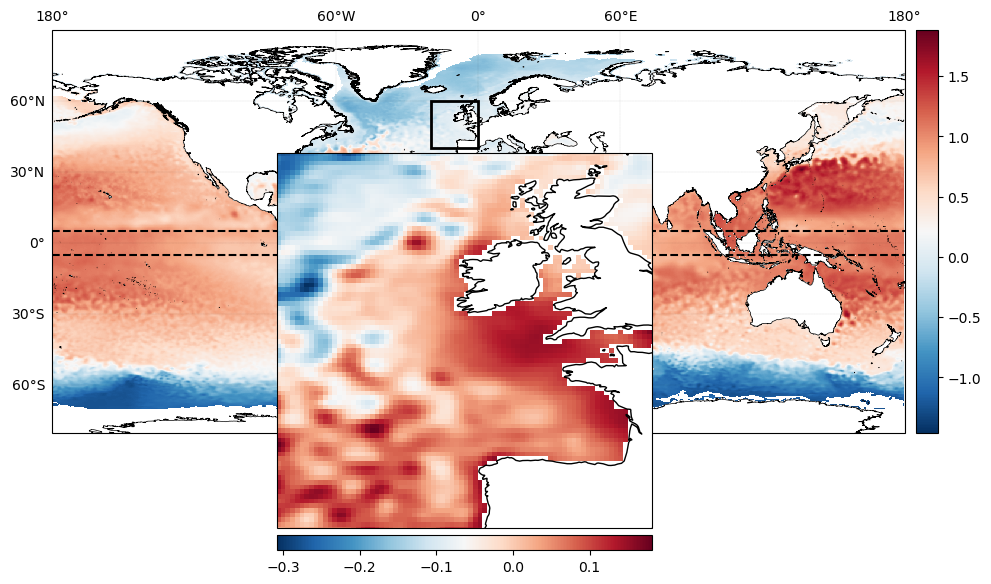

In [51]:
plot_map_zoom(ssh.adt[0],ssh.lon,ssh.lat)

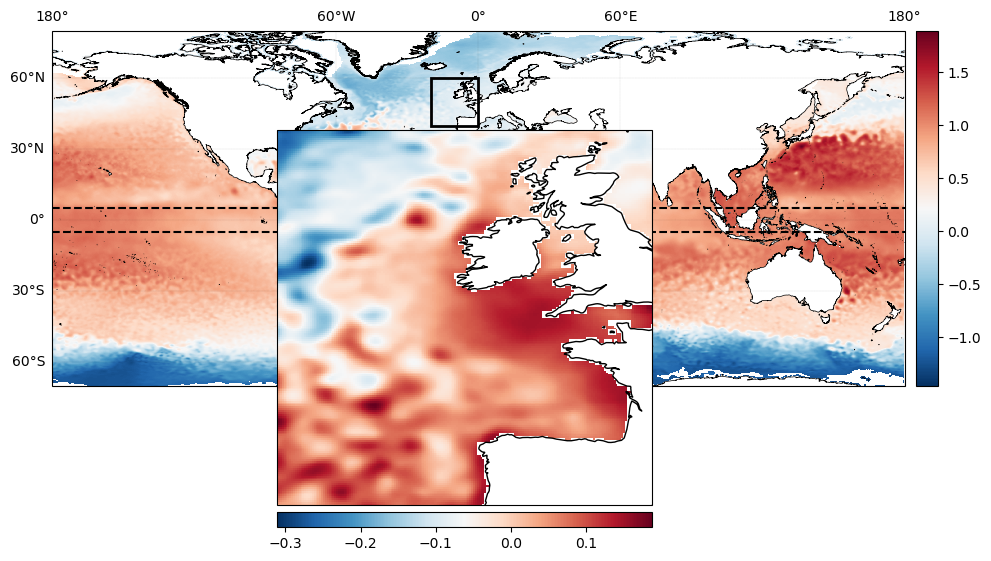

In [53]:
plot_map_zoom(maps.adt[0],maps.lon,maps.lat)